In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [ ]:
iris = load_iris(as_frame=True)   # load iris dataset
df = iris.frame.copy()   # copy the data to a pandas DataFrame

In [ ]:
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","target"]   # rename columns

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)   # drop duplicates and reset index

In [35]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


In [ ]:
df["species"] = df["target"] 
target_names = iris.target_names.tolist()    # Get the target names from the dataset


In [ ]:
df["petal_area"] = df["petal_length"] * df["petal_width"]    # Calculate petal area

In [38]:
features = ["sepal_length","sepal_width","petal_length","petal_width","petal_area"]

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)   # Scaling the data

In [ ]:
df = pd.concat([df_scaled, df[["species"]]], axis=1)   # Concatenate the scaled data with the species column

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,species
0,-0.898033,1.012401,-1.333255,-1.308624,-1.167271,0
1,-1.139562,-0.137353,-1.333255,-1.308624,-1.167271,0
2,-1.381091,0.322549,-1.390014,-1.308624,-1.171525,0
3,-1.501855,0.092598,-1.276496,-1.308624,-1.163017,0
4,-1.018798,1.242352,-1.333255,-1.308624,-1.167271,0


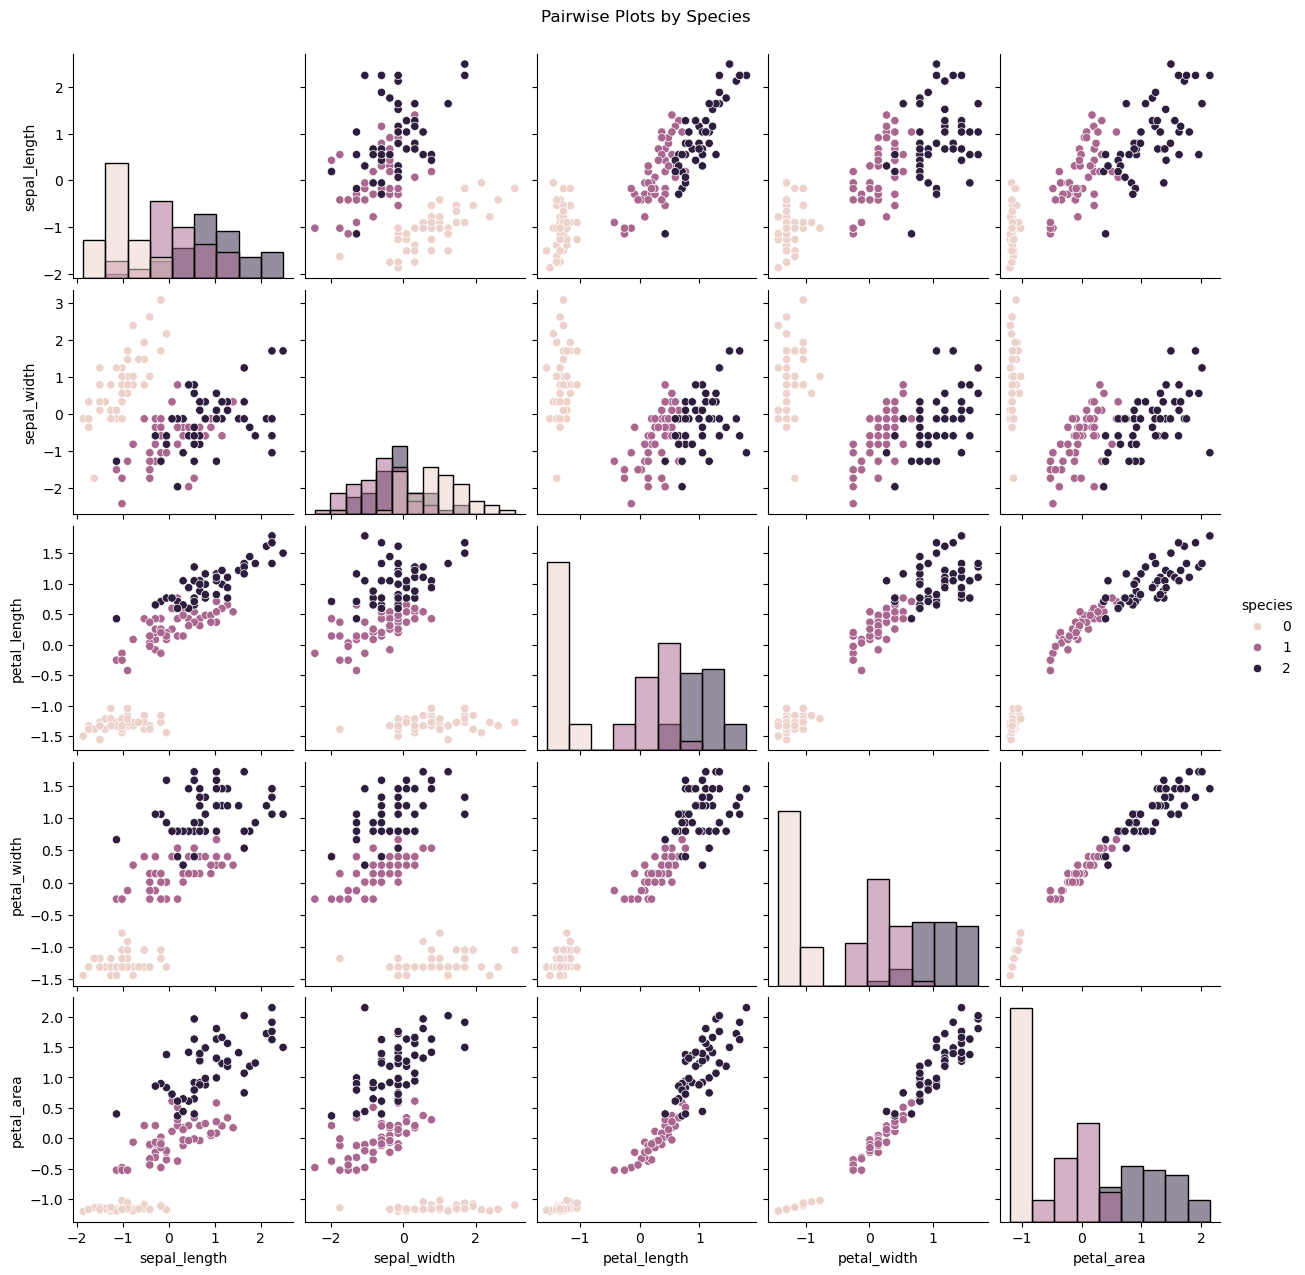

In [ ]:
sns.pairplot(df, hue="species", vars=features, diag_kind="hist")    # Show the plot
plt.suptitle("Pairwise Plots by Species", y=1.02)
plt.show()

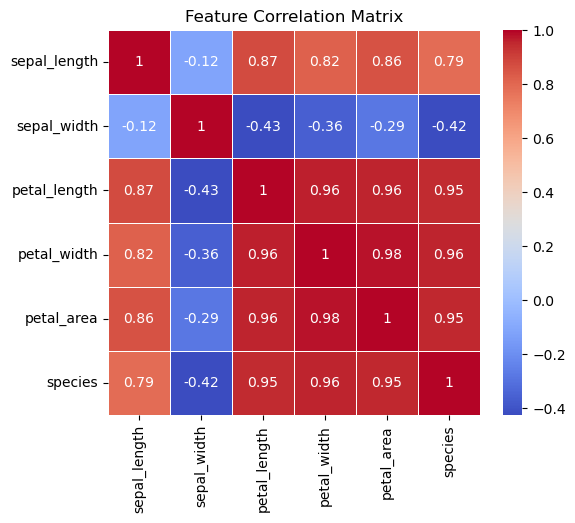

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)   # heatmap of correlation matrix
plt.title("Feature Correlation Matrix")  
plt.show()

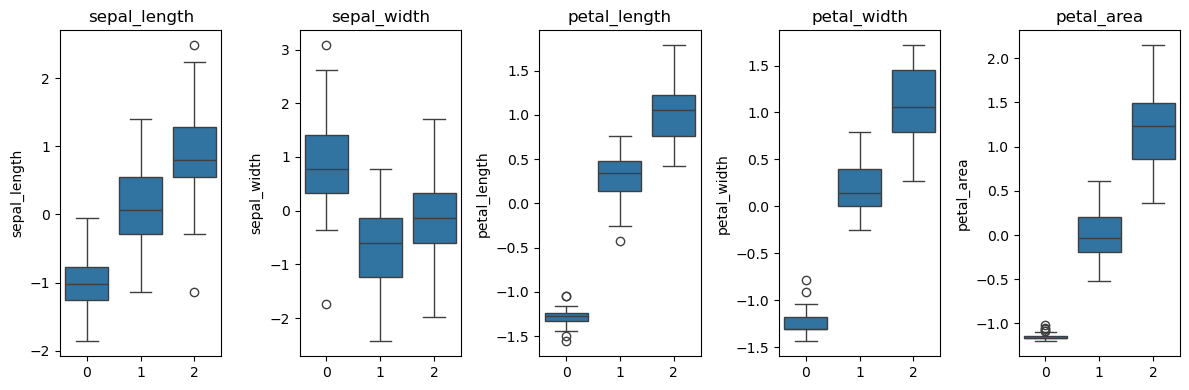

In [ ]:
plt.figure(figsize=(12,4))
for i, col in enumerate(features):   # loop over each column
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x="species", y=col, data=df)    # plot the boxplot
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()    # ensure labels fit within the figure
plt.show()

In [ ]:
X = df[features]    # Select the columns of interest
y = df["species"]    # Select the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)   # predict the output

In [ ]:
acc = accuracy_score(y_test, y_pred)   # accuracy
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9111


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [ ]:
with open("iris_model.pkl", "wb") as f:   
    pickle.dump(model, f)    # dump the model to the file


In [ ]:
with open("iris_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)   # Dump the scaler object into the file

In [ ]:
df_original = pd.DataFrame(scaler.inverse_transform(df[features]), columns=features)   # inverse transform

In [ ]:
df_original["species"] = df["species"]   # assign the new column to the original dataframe

In [ ]:
df_original.to_csv("iris_slider_data.csv", index=False)   # save the data to a csv file

In [56]:
print("Model, scaler, and slider data saved.")

Model, scaler, and slider data saved.
